In [13]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib as mpl
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "hinge"))
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [14]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [15]:
svm_clf.predict([[1.1, 1]])

array([0.])

In [16]:
# Non linear SVM Classification
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples = 100, noise = 0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 3)),
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "hinge"))
])

polynomial_svm_clf.fit(X, y)

/Users/kamilstaszewski/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [17]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

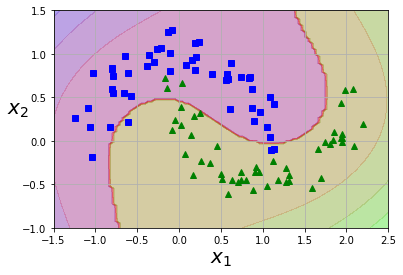

In [18]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.2)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [19]:
# Polynomial Kernel - same result as if you had added many polynomial features, without actually having to add them
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "poly", degree = 10, coef0 = 100, C = 5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

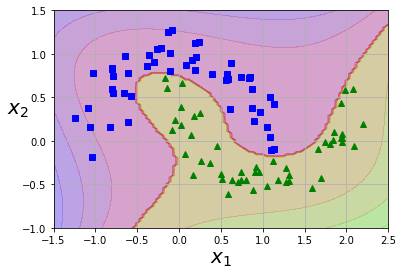

In [20]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [21]:
# Similarity Featrues - add features computed using a similarity function, which measure how much each instance resemble a particular landmark
# - may be computationally expensive to compute all the additional features if large training set


In [22]:
# Gaussian RBF Kernel - kernel trick makes it possible to obtain a similar result as if you had added many similarity features
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "rbf", gamma = 5, C = 0.001))
])
rbf_kernel_svm_clf.fit(X, y)
# gamma - if model is overfitting, you should reduce it; if model is underfitting, you should increase it (similar to C hyperparameter)
# kernel - a feature transformation in an (infinite) feature space, similar to polynomial feature transofmration

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [25]:
# LinearSVC, which doesnt support the kernel trick, has a training time complexity of O(m x n) m - instances, n - features

# SVC training time complexity is between O(m**2 x n) and O(m**3 x n).
# It means that is slow for big number of training instances, so its perfect for complex small or medium sized training sets

# SVM Regression - supports linear/nonlinear classification, but also linear/nonlinear regression.
# the trick is to reverse the objective: instead of trying to fit the largest possbile street between two classes
# while limiting margin violations, SVM regression tries to fit as many instances as possible ON the street while limiting violations(instances off the street)
# the width of street is controlleed by a hyperparameter ε (called tol in Scitkit-Learn)
# adding more training instances within the margin does not affect the model's prediction
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(X, y)

# to tackle nonlinear regression tasks, you can use kernalized SVM model
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel = "poly", degree = 2, C = 100, epsilon = 0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')